In [1]:
from ultralytics import YOLO

model = YOLO("weights/table-bank.pt")


0: 640x640 1 table, 10.5ms
1: 640x640 1 table, 10.5ms
2: 640x640 1 table, 10.5ms
3: 640x640 1 table, 10.5ms
4: 640x640 1 table, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


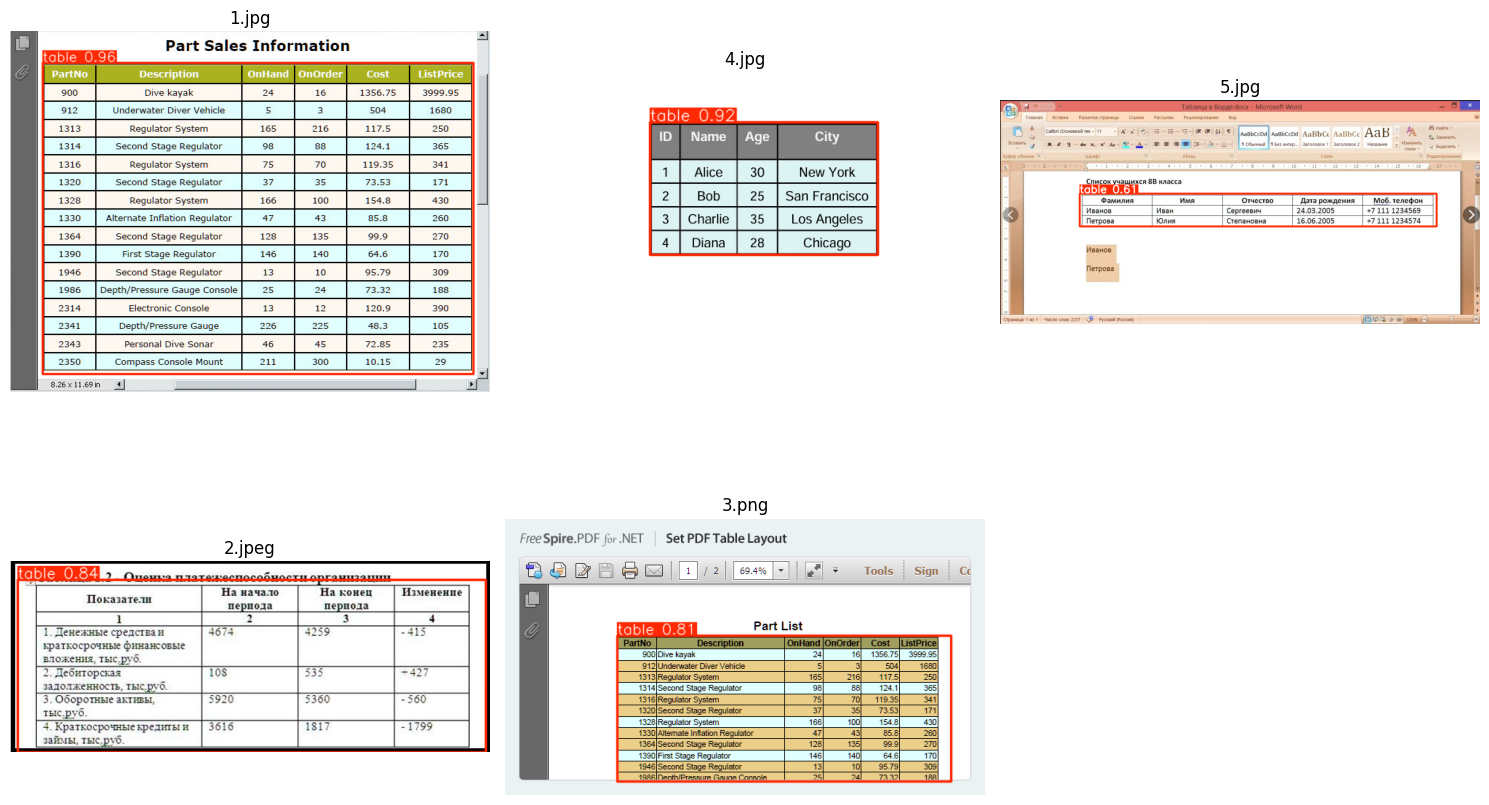

In [4]:
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import numpy as np

model_path = "weights/table-bank.pt"
images_path = Path("../resources/images/")
model = YOLO(model_path)

image_files = list(images_path.glob("*.jpg")) + \
              list(images_path.glob("*.jpeg")) + \
              list(images_path.glob("*.png"))
results = model.predict(source=[str(p) for p in image_files], save=False)

# Визуализируем результаты
n = len(results)
cols = min(n, 3)
rows = (n + cols - 1) // cols
plt.figure(figsize=(5 * cols, 5 * rows))

for i, (img_path, result) in enumerate(zip(image_files, results)):
    img = result.plot()  # RGB array

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(img_path.name)
    plt.axis('off')

plt.tight_layout()
plt.show()
